In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import explained_variance_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [23]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
from UTILS import cleaning_processing, preprocessing_Origins
import config_origins_chapter0 as config

C:\Users\camil\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


2


In [24]:
path_extracted_data = config.path_extracted_data
path_extracted_data_cleaning = os.path.join(path_extracted_data,'Cleaning')

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Simulate data

,0,1
0,-0.087485,-1.333915
1,1.466121,0.389875
2,-0.142676,1.012680


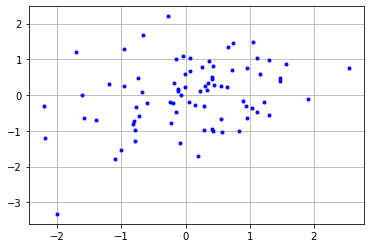

In [2]:
num_samples = 80
#mean
mu = np.array([0, 0])
#the desired covariance matrix.
r = np.array([[1, 0.3], #diagnonal: variance and other is covaraince
              [0.3,  1]])
#generate the random samples and plot it
y = np.random.multivariate_normal(mu, r, size=num_samples)
plt.plot(y[:,0], y[:,1], 'b.')
plt.grid(True)
#put in dataframe
df = pd.DataFrame(y)
display(df.head(3))

## Add random noise and match it to EV

In [3]:
#(vector of noise centered around 1 and multiply to the data)
#OR vector of noise centered around 0 and add it to your data
noise = np.random.normal(0,1,num_samples)
#0: mean of the normal distribution you are choosing from
#1: standard deviation of the normal distribution
#100: nbr of elements you get in array noise

(80, 103)


,0,1,0_noise0,0_noise1,0_noise2,0_noise3,0_noise4,0_noise5,0_noise6,0_noise7,...,0_noise91,0_noise92,0_noise93,0_noise94,0_noise95,0_noise96,0_noise97,0_noise98,0_noise99,0_noise100
0,-0.087485,-1.333915,-0.087485,-0.050029,0.074815,0.242483,0.113718,0.163042,0.262698,0.333456,...,-0.747041,-0.695238,-0.723098,-0.906924,-0.832999,-0.759771,-0.481493,-0.350345,-0.498836,-0.290681
1,1.466121,0.389875,1.466121,1.295896,1.214120,1.222406,1.214379,1.205877,1.169791,1.049903,...,-0.340066,-0.350431,-0.303997,-0.459553,-0.404327,-0.348614,-0.341006,-0.502175,-0.371986,-0.400510
2,-0.142676,1.012680,-0.142676,-0.141918,-0.042143,-0.013522,-0.212459,-0.189616,-0.339764,-0.253256,...,-0.744221,-0.815941,-0.788658,-0.686835,-0.747848,-0.886862,-0.876374,-0.853905,-0.885731,-0.748348


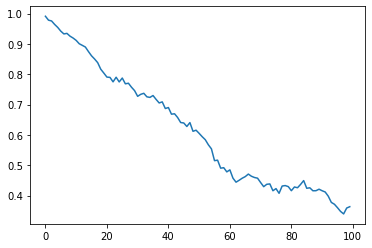

In [4]:
df['0_noise0'] = df[0].copy()
k = 1
li_EV = []
max_k = 100
while k<=max_k:
    #add noise
    noise = np.random.normal(0,0.1,num_samples) #at each run it prodices a different noise
    df['0_noise'+str(k)] = df['0_noise'+str(k-1)] + noise
    #convert it to EV from the noisy vector on the initial one
    li_EV.append(explained_variance_score(df['0_noise'+str(k)].tolist(), df['0_noise0'].tolist()))
    k = k+1
plt.plot(li_EV)
print(df.shape)
df.head(3)

## Measurement error effect on the corr. coeff

In [5]:
li_coeff = []
li_pval = []
li_EV = []
for k in range(0,max_k+1):
    coeff,pval = stats.spearmanr(df[1].tolist(), df['0_noise'+str(k)].tolist())
    li_coeff.append(coeff)
    li_pval.append(pval)
    li_EV.append(explained_variance_score(df['0_noise'+str(k)].tolist(), df['0_noise0'].tolist()))
df_res = pd.DataFrame({'correlation coefficient':li_coeff, 'pvalue':li_pval, 'EV':li_EV})
df_res

,correlation coefficient,pvalue,EV
0,0.279934,0.011907,1.000000
1,0.292241,0.008528,0.991392
2,0.292382,0.008494,0.978473
3,0.259611,0.020045,0.975856
4,0.262353,0.018725,0.964396
...,...,...,...
96,0.010759,0.924534,0.359870
97,-0.010947,0.923223,0.347592
98,-0.019948,0.860582,0.339338
99,0.007759,0.945541,0.358773


In [14]:
df_res['significant'] = df_res['pvalue'].map(lambda x: x<=0.05)

plt.plot(df_res['correlation coefficient'].tolist(), df_res['EV'].tolist());
plt.plot(df_res['correlation coefficient'].tolist(), df_res['EV'].tolist(), "or")
plt.xlabel('correlation coefficient')
plt.ylabel('MS expressed with explained variance')
#plt.title('Measurement error (MS) effect on Pearson correlation coefficient')
plt.grid(True)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


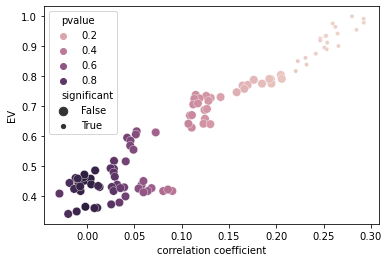

In [26]:
sns.scatterplot('correlation coefficient','EV',data=df_res, hue='pvalue', size='significant');
plt.savefig(os.path.join(path_extracted_data_cleaning,'simulatedEffectofMeasurementErrors.png'), dpi=300, bbox_inches='tight')